In [1]:
import datetime
import time

import pandas as pd
import seaborn as sns

from QueryMSC import workflow_tools

In [2]:
connection_string = "postgresql+psycopg2://nannau@dbmsc.pcic.uvic.ca/msc"

In [4]:
start_time = datetime.datetime(2000, 1, 1)
end_time = datetime.datetime(2001, 1, 10)

msc = workflow_tools(connection_string, start_time, end_time)

In [5]:
precip = msc.annual_rain()

Year interval: 1.0


In [6]:
pd.read_sql(precip.statement, msc.engine).head()

,sum,max_date,min_date,lat,lon,station_id
0,1917.0,2001-01-10,2000-01-01,50.3332,-125.4460,176
1,377.8,2001-01-10,2000-01-01,50.4667,-106.0670,3953
2,697.4,2001-01-10,2000-01-01,48.5697,-81.3767,5468
3,856.3,2001-01-10,2000-01-01,49.7833,-97.1333,4831
4,342.5,2001-01-10,2000-01-01,58.7667,-111.1170,3610


In [7]:
variables = msc.query_variables()

In [8]:
pd.read_sql(variables.statement, msc.engine).head()

,vars_id,standard_name,long_description,unit
0,1401,,Hail,boolean
1,1424,,Smoke or Haze,boolean
2,1291,cloud_base_altitude,Ceiling currently observed,30s of meters
3,1292,visibility_in_air,Visibility currently observed,0.1 km
4,1293,air_pressure_at_sea_level,Sea level pressure,0.01 kPa


In [9]:
temp_25 = msc.design_temp_25()
print(temp_25)

SELECT percentile_cont(%(percentile_cont_1)s) WITHIN GROUP (ORDER BY crmp.obs_raw.datum ASC) AS temp, min(crmp.obs_raw.obs_time) AS time_min, max(crmp.obs_raw.obs_time) AS time_max, crmp.meta_history.lat AS crmp_meta_history_lat, crmp.meta_history.lon AS crmp_meta_history_lon, crmp.meta_history.station_id AS crmp_meta_history_station_id 
FROM crmp.meta_vars, crmp.obs_raw JOIN crmp.meta_history ON crmp.meta_history.history_id = crmp.obs_raw.history_id 
WHERE crmp.obs_raw.obs_time >= %(obs_time_1)s AND crmp.obs_raw.obs_time <= %(obs_time_2)s AND crmp.meta_vars.vars_id = %(vars_id_1)s AND EXTRACT(month FROM crmp.obs_raw.obs_time) = %(param_1)s GROUP BY crmp.meta_history.lat, crmp.meta_history.lon, crmp.meta_history.station_id


In [10]:
start = time.time()
df= pd.read_sql(temp_25.statement, msc.engine)
end = time.time()
print((end-start)/60., 'minutes')

1.2525458335876465 minutes


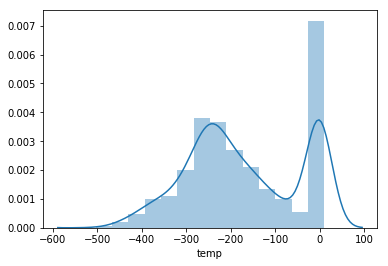

In [11]:
sns.distplot(df['temp'])